# Análise de series temporais

Dados de series temporais assumem cada vez mais importancia com a era da internet das coisas (IoT), da digitalizacao de sistemas de hospitais e das cidades inteligentes. Podemos esperar que dados dessa forma crescam exponencialmente com mais qualidade, quantidade e revelencia. 
Por esse motivo, cria-se uma demanda para o estudo e analise de dados de series temporais.


# Motivação e Importância

As séries temporais são um campo fascinante e em constante evolução da análise de dados.

Ao estudar séries temporais, é possível explorar conceitos complexos, como autocorrelação, estacionariedade, sazonalidade e modelos preditivos. Além disso, há uma grande variedade de técnicas disponíveis para análise de séries temporais, como ARIMA, modelos de suavização exponencial, redes neurais, entre outros.

# Objetivos

O objetivo deste trabalho é entender e aplicar técnicas de análise e modelagem para prever comportamentos futuros de uma série temporal de interesse. Para isso, serão explorados conceitos como autocorrelação, estacionariedade, sazonalidade e modelos preditivos, a fim de obter uma compreensão mais profunda dos dados.

# Revisão Bibliografica

## Datasets

- https://archive-beta.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

## Tutoriais

- https://youtu.be/vV12dGe_Fho
- https://youtu.be/z3ZnOW-S550
- https://youtu.be/xi0vhXFPegw

## Artigos

- https://arxiv.org/pdf/2004.13408.pdf
- https://arxiv.org/pdf/2205.13504v3.pdf

# Prerequisitos

Extrair o .zip que se encontra dentro da pasta data.

In [173]:
! unzip data/household_power_consumption.zip -d data/

Archive:  data/household_power_consumption.zip
replace data/household_power_consumption.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


# Base de dados

Essa base de dados contem 2075259 medidas coletadas em uma casa na cidade de Sceaux (7km de Paris) entre Dezembro de 2006 e Novembro de 2010.

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()

In [175]:
FILE_PATH = 'data/household_power_consumption.txt'

df = pd.read_csv(FILE_PATH, delimiter=';', dtype=str)

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


In [176]:
def join_date_and_time(df):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
    df = df.drop(['Time'], axis=1)
    return df

In [177]:
df = join_date_and_time(df)

In [178]:
df = df.set_index('Date')
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


# Tratamento dos dados

In [179]:
def remove_trash(df):
    df = df.copy()
    df = df[~df['Global_active_power'].str.contains('?', regex=False)]
    df = df[~df['Global_reactive_power'].str.contains('?', regex=False)]
    df = df[~df['Voltage'].str.contains('?', regex=False)]
    df = df[~df['Global_intensity'].str.contains('?', regex=False)]
    df = df[~df['Sub_metering_1'].str.contains('?', regex=False)]
    df = df[~df['Sub_metering_2'].str.contains('?', regex=False)]
    df = df[~df['Sub_metering_3'].str.contains('?', regex=False)]
    return df

In [180]:
df = remove_trash(df)

In [181]:
def to_numeric(df):
    df = df.copy()
    df['Global_active_power'] = pd.to_numeric(df['Global_active_power'])
    df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'])
    df['Voltage'] = pd.to_numeric(df['Voltage'])
    df['Global_intensity'] = pd.to_numeric(df['Global_intensity'])
    df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'])
    df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'])
    df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'])
    return df

In [182]:
df = to_numeric(df)

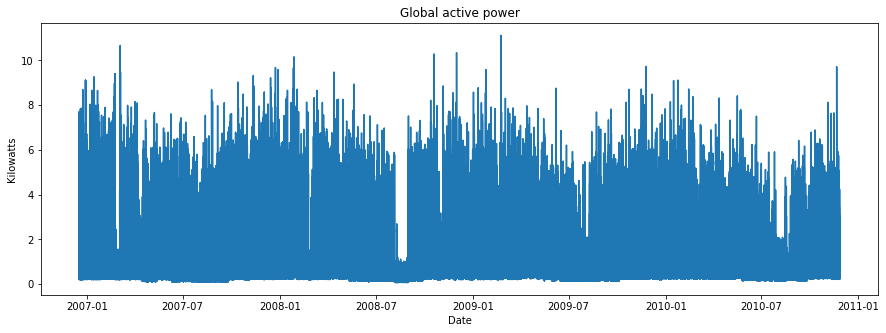

In [183]:
plt.figure(figsize=(15,5))
plt.title('Global active power')
plt.plot(df.index, df['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Kilowatts')
plt.show()

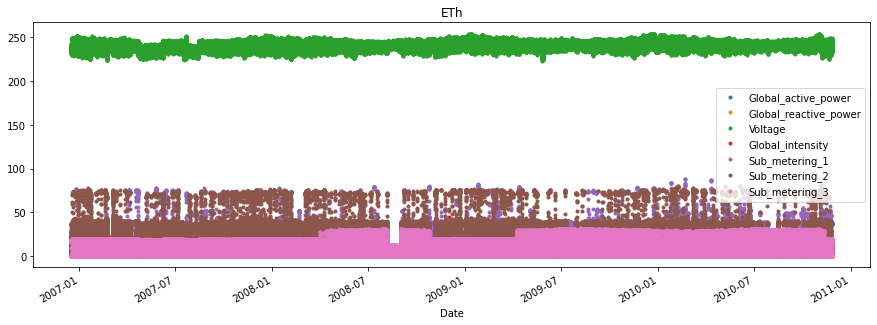

In [184]:
df.plot(style='.', figsize=(15,5), title='ETh')
plt.show()

In [190]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06
mean,1.09162,0.123714,240.84,4.62776,1.12192,1.29852,6.45845
std,1.05729,0.112722,3.23999,4.4444,6.15303,5.82203,8.43715
min,0.076,0,223.2,0.2,0,0,0
25%,0.308,0.048,238.99,1.4,0,0,0
50%,0.602,0.1,241.01,2.6,0,0,1
75%,1.528,0.194,242.89,6.4,0,1,17
max,11.122,1.39,254.15,48.4,88,80,31


<AxesSubplot:ylabel='Density'>

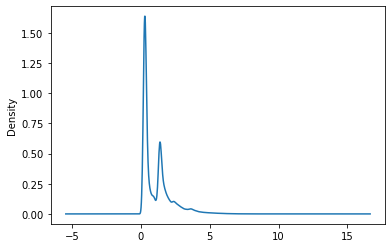

In [192]:
df['Global_active_power'].plot.kde()